# 메인 퀘스트 2

---

## **1. 문제 정의**  
* 전설의 포켓몬과 일반 포켓몬을 분류할 수 있는 포켓만 도감(Pokedex) 만들기  
* 목표: True와 False에 대한 Recall이 92% 이상이여야 한다.

---

## **2. 데이터 수집**  


  * 획득 데이터: pokemon.csv  
  * 데이터 출처: [Pokemon with stats](https://www.kaggle.com/datasets/abcsds/pokemon, "Pokemon with stats")   
  * 데이터 획득: 출처  ☞  우측 상단 Download(15kB) 클릭  ☞  압축 해제
  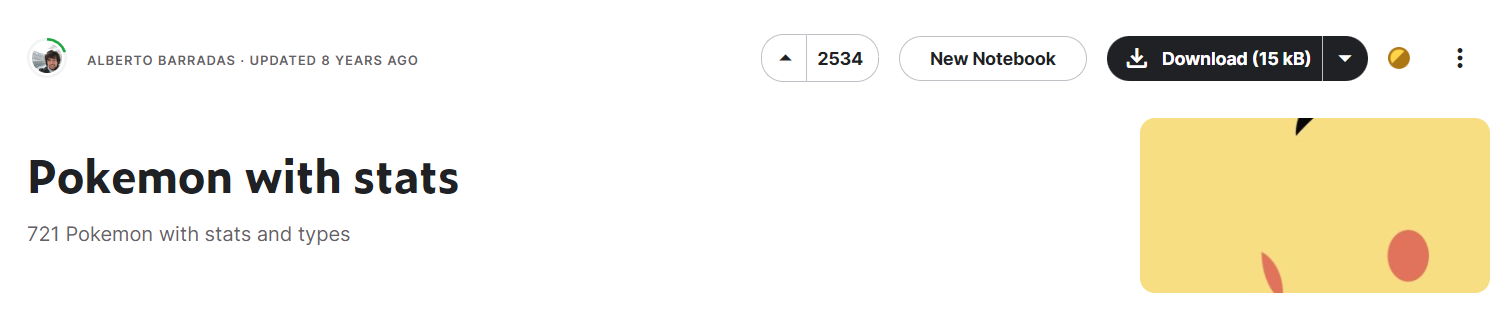
  * 데이터 설명  
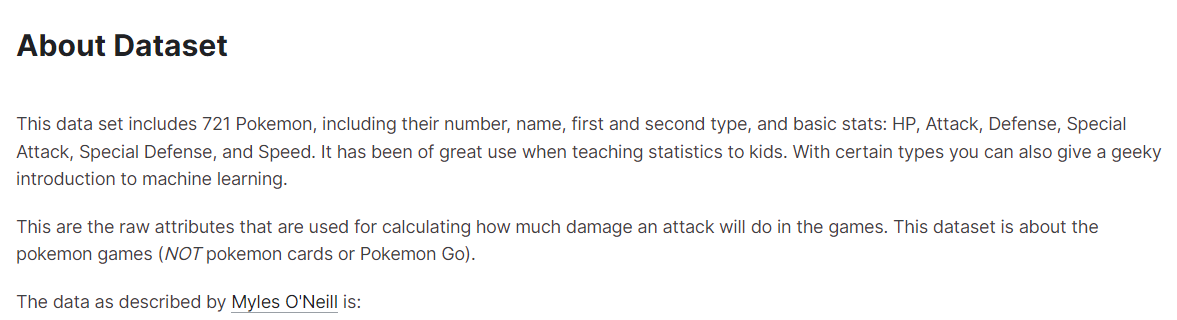  
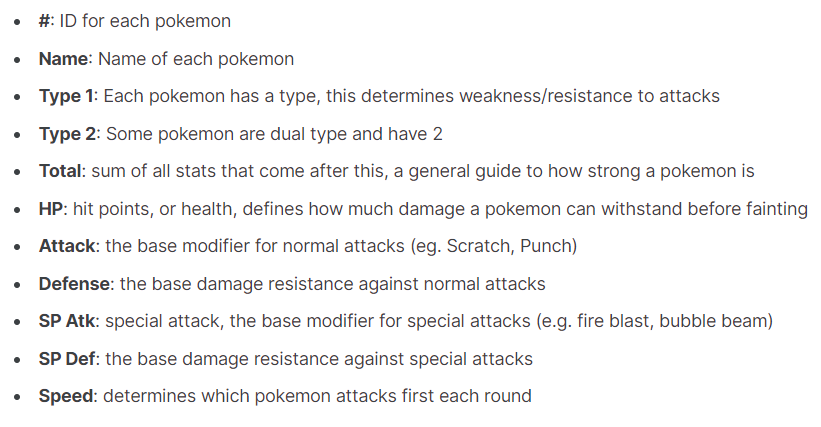

## **3. 데이터 가공**  

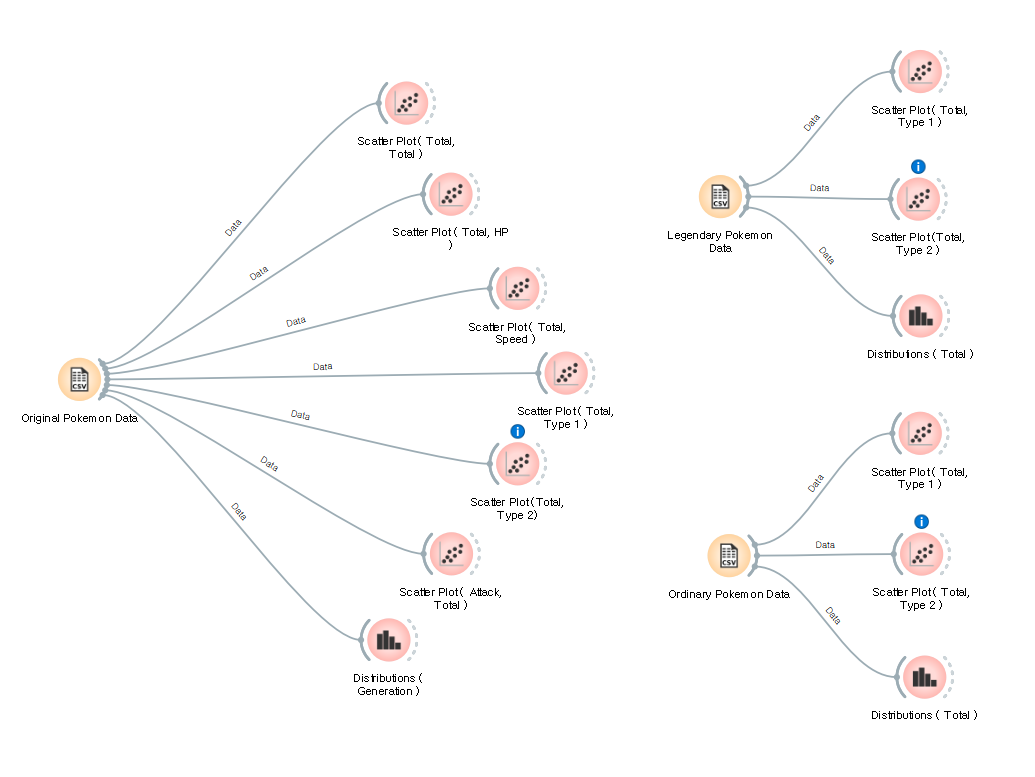

### 가. 데이터 분석 환경 준비

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 나. 인코딩 확인  
image.png

---

### 다. 데이터 확인  
| `행` | `열`| `결측치` | `데이터 타입` |
|------|-----|---------|---------------|
|800개| 13개|   Type 2 칼럼에 **386개**  |bool(1), int 64(9), object(3)|

In [4]:
# 파일 개방
data_path = "/content/drive/MyDrive/아이펠 온라인 8기 코어 과정/아이펠 본과정/케창딥/Pokemon.csv"
original_data = pd.read_csv(data_path)


# 데이터 정보 확인
pokemon_data = original_data.copy()
print(pokemon_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


---

### 라. 데이터 특성 이해

#### 1) 원본 데이터 특성 이해

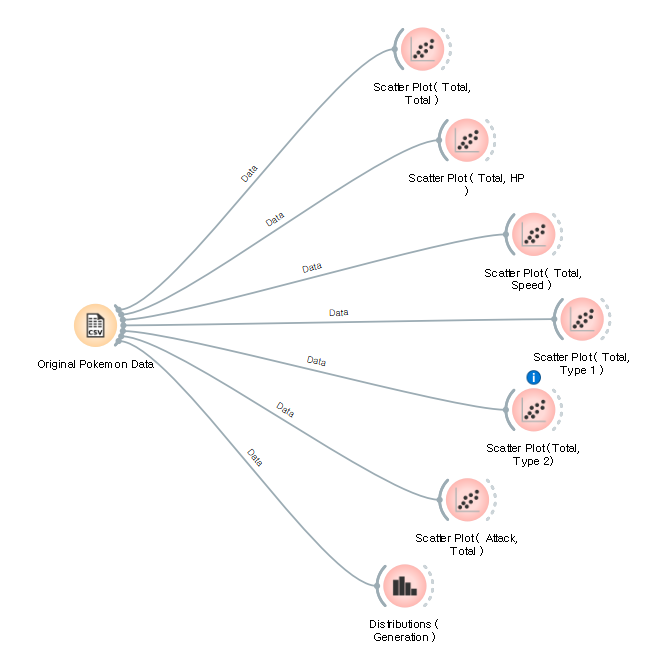

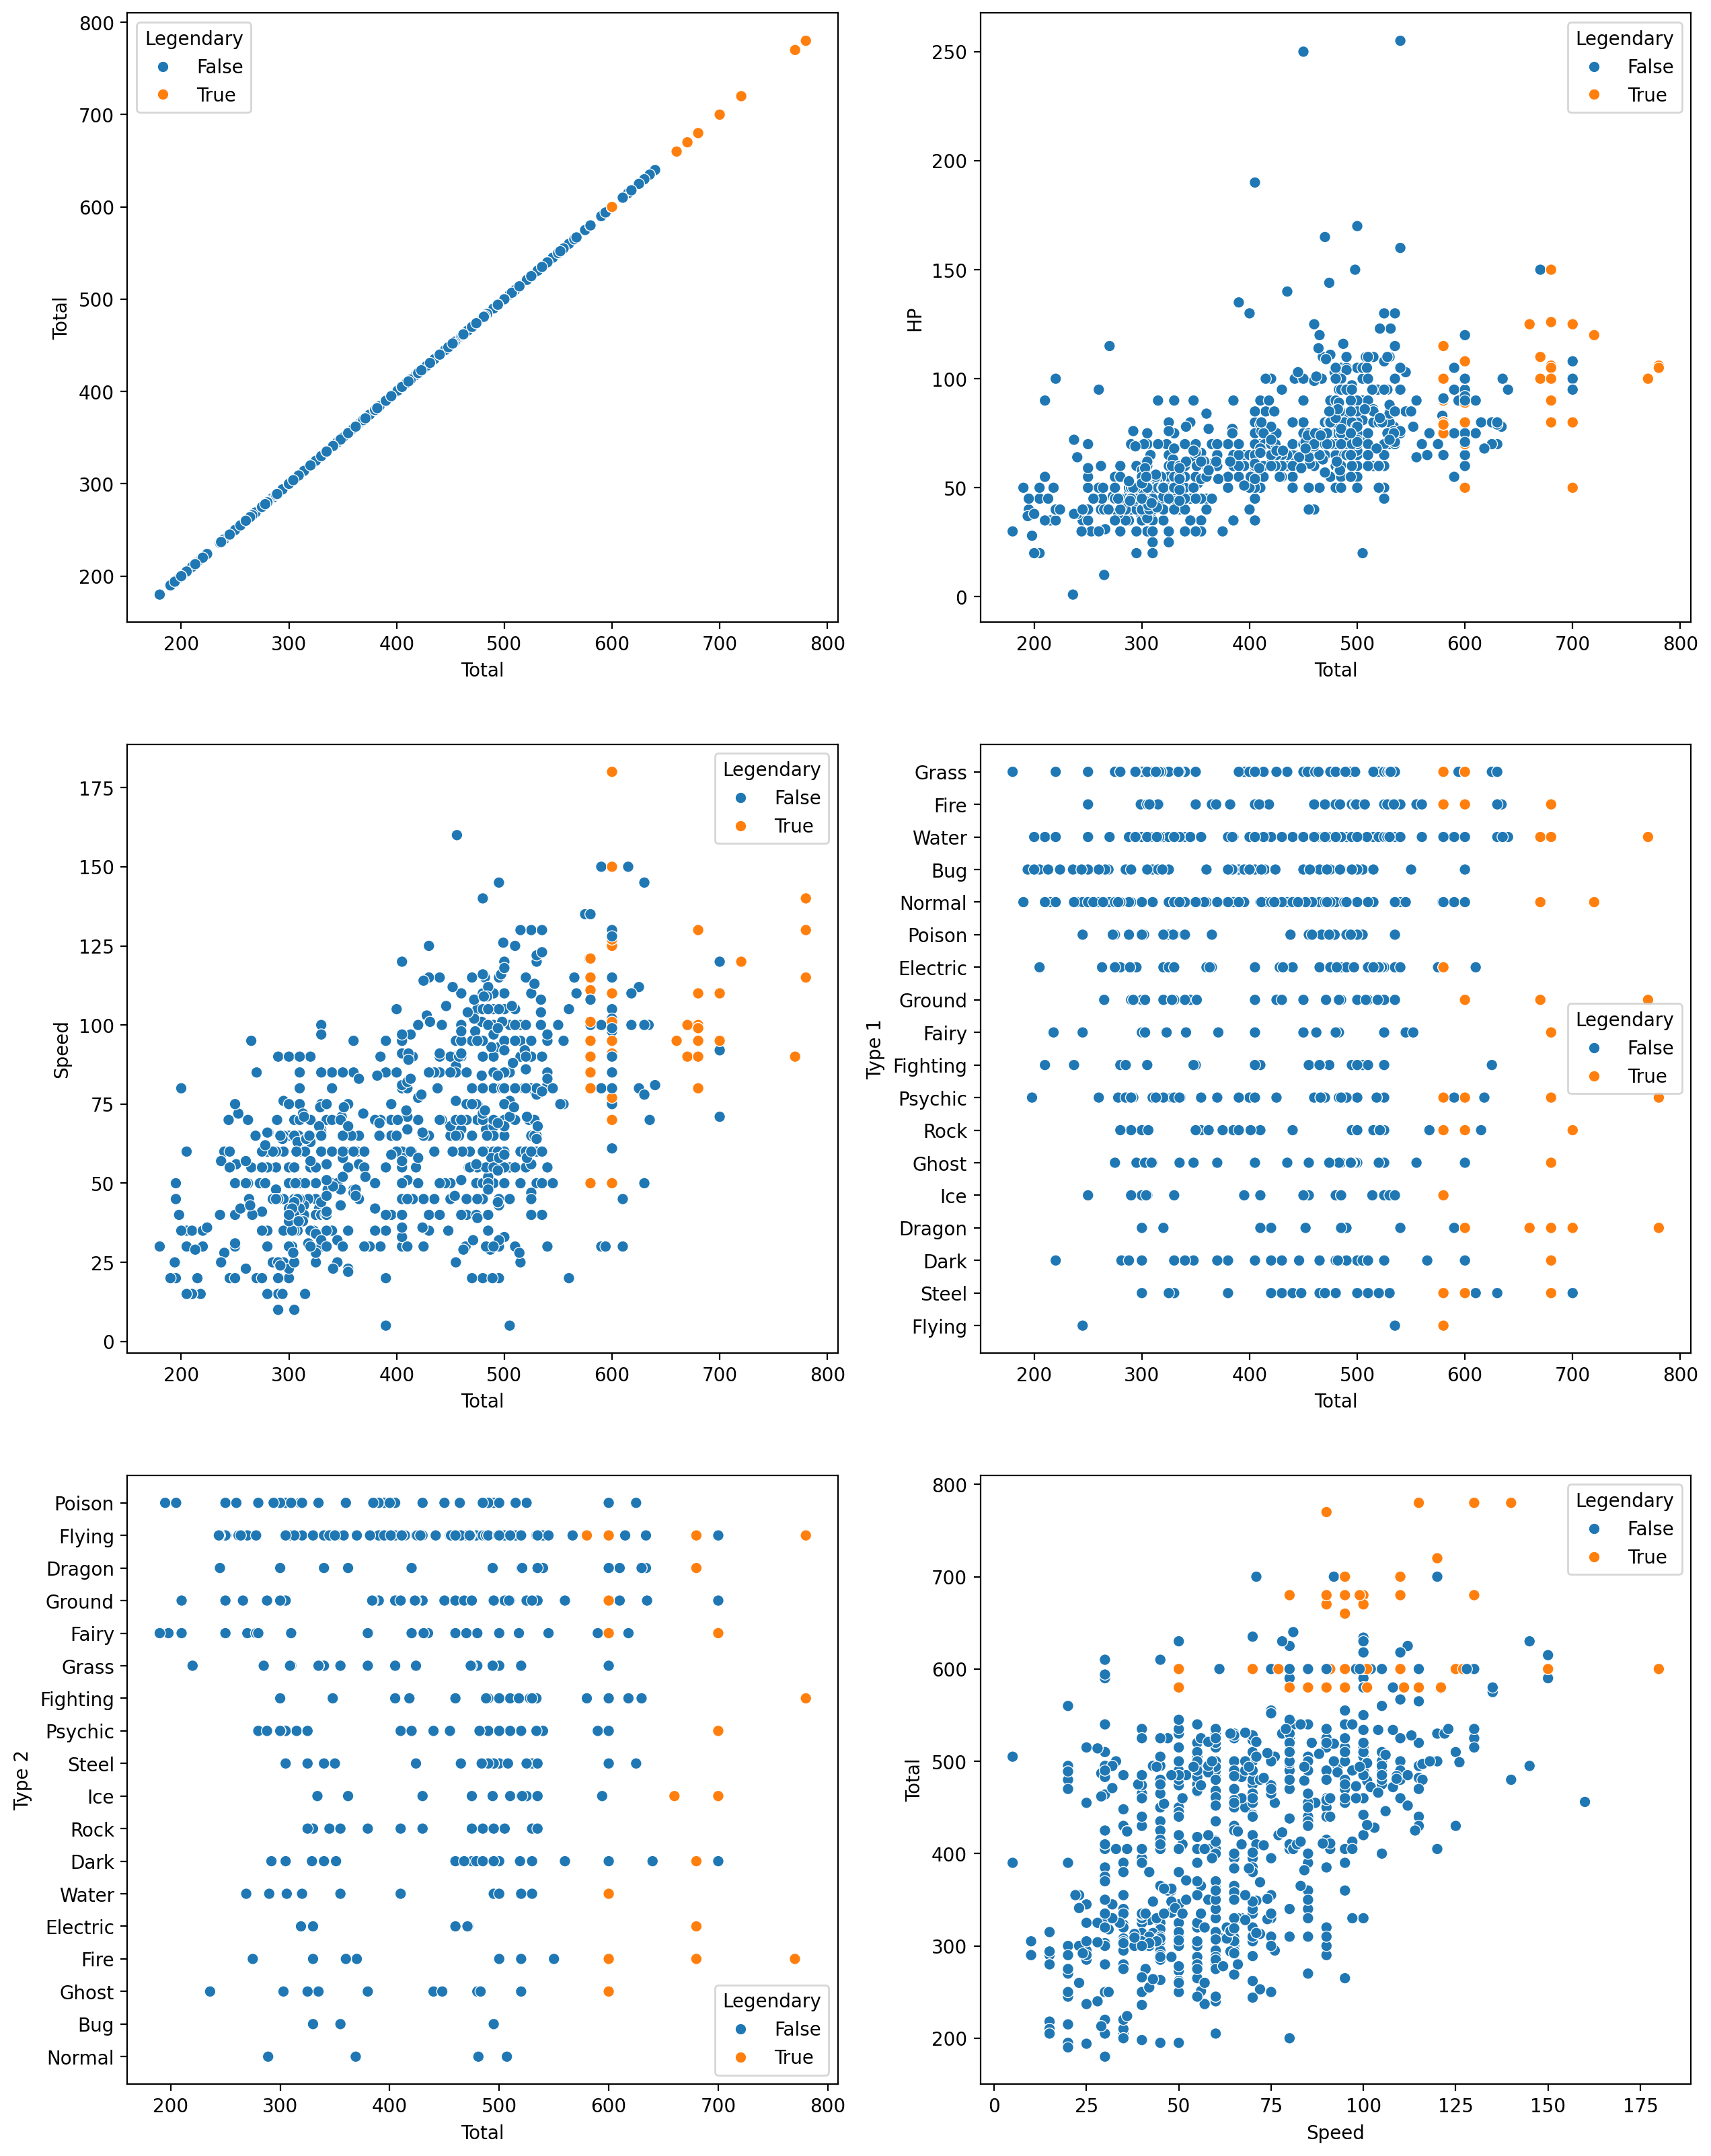

'\n   Total은 일반 포켓몬과 전설 포켓몬을 구분할 수 있는 실마리\n   Total, Speed, Attack은 양의 상관관계가 가능성 있음\n'

In [8]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 20)

# ( Total, Total ) 관계
sns.scatterplot(data = pokemon_data, y = "Total", x = "Total",
                hue = "Legendary", ax = ax1)

# ( Total, HP ) 관계
sns.scatterplot(data=pokemon_data, y = "HP", x = "Total",
                hue = "Legendary", ax = ax2)

# ( Total, Speed ) 관계
sns.scatterplot(data=pokemon_data, y = "Speed", x = "Total",
                hue = "Legendary", ax = ax3)

# ( Total, Sp. Atk ) 관계
sns.scatterplot(data=pokemon_data, y = "Type 1", x = "Total",
                hue = "Legendary", ax = ax4)

# ( Total, Sp. Def ) 관계
sns.scatterplot(data=pokemon_data, y = "Type 2", x = "Total",
                hue = "Legendary", ax = ax5)

# ( Attack, Total ) 관계)
sns.scatterplot(data=pokemon_data, y = "Total", x = "Speed",
                hue = "Legendary", ax = ax6)

plt.show()



'''
   Total은 일반 포켓몬과 전설 포켓몬을 구분할 수 있는 실마리
   Total, Speed, Attack은 양의 상관관계가 가능성 있음
'''

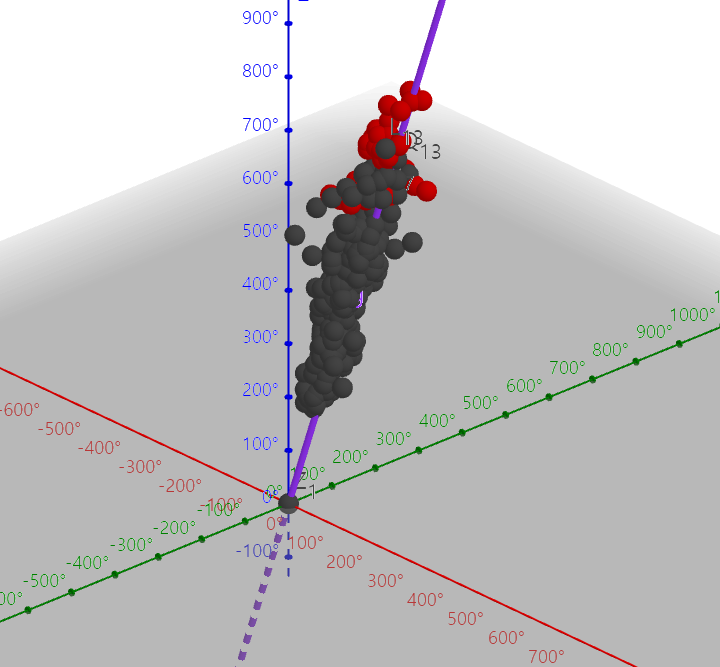




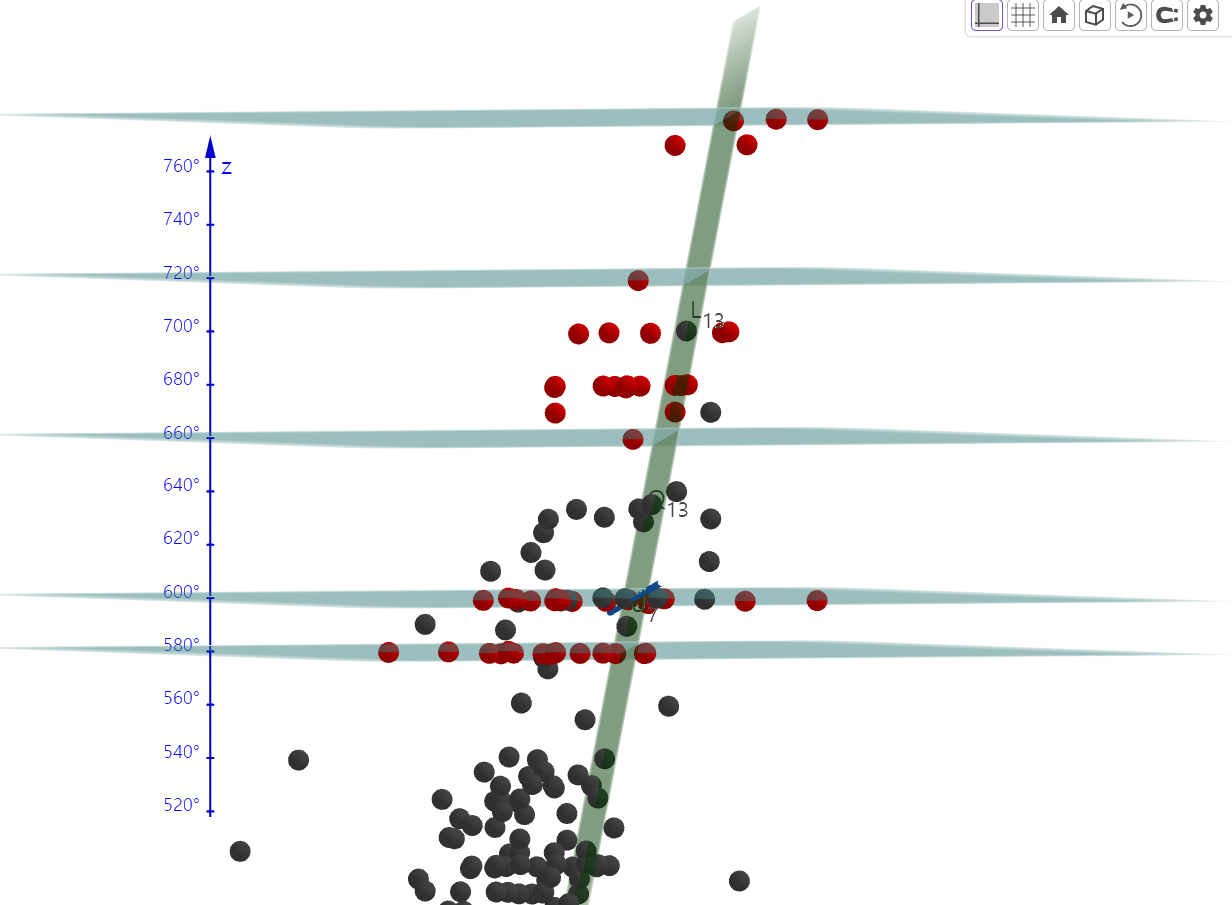

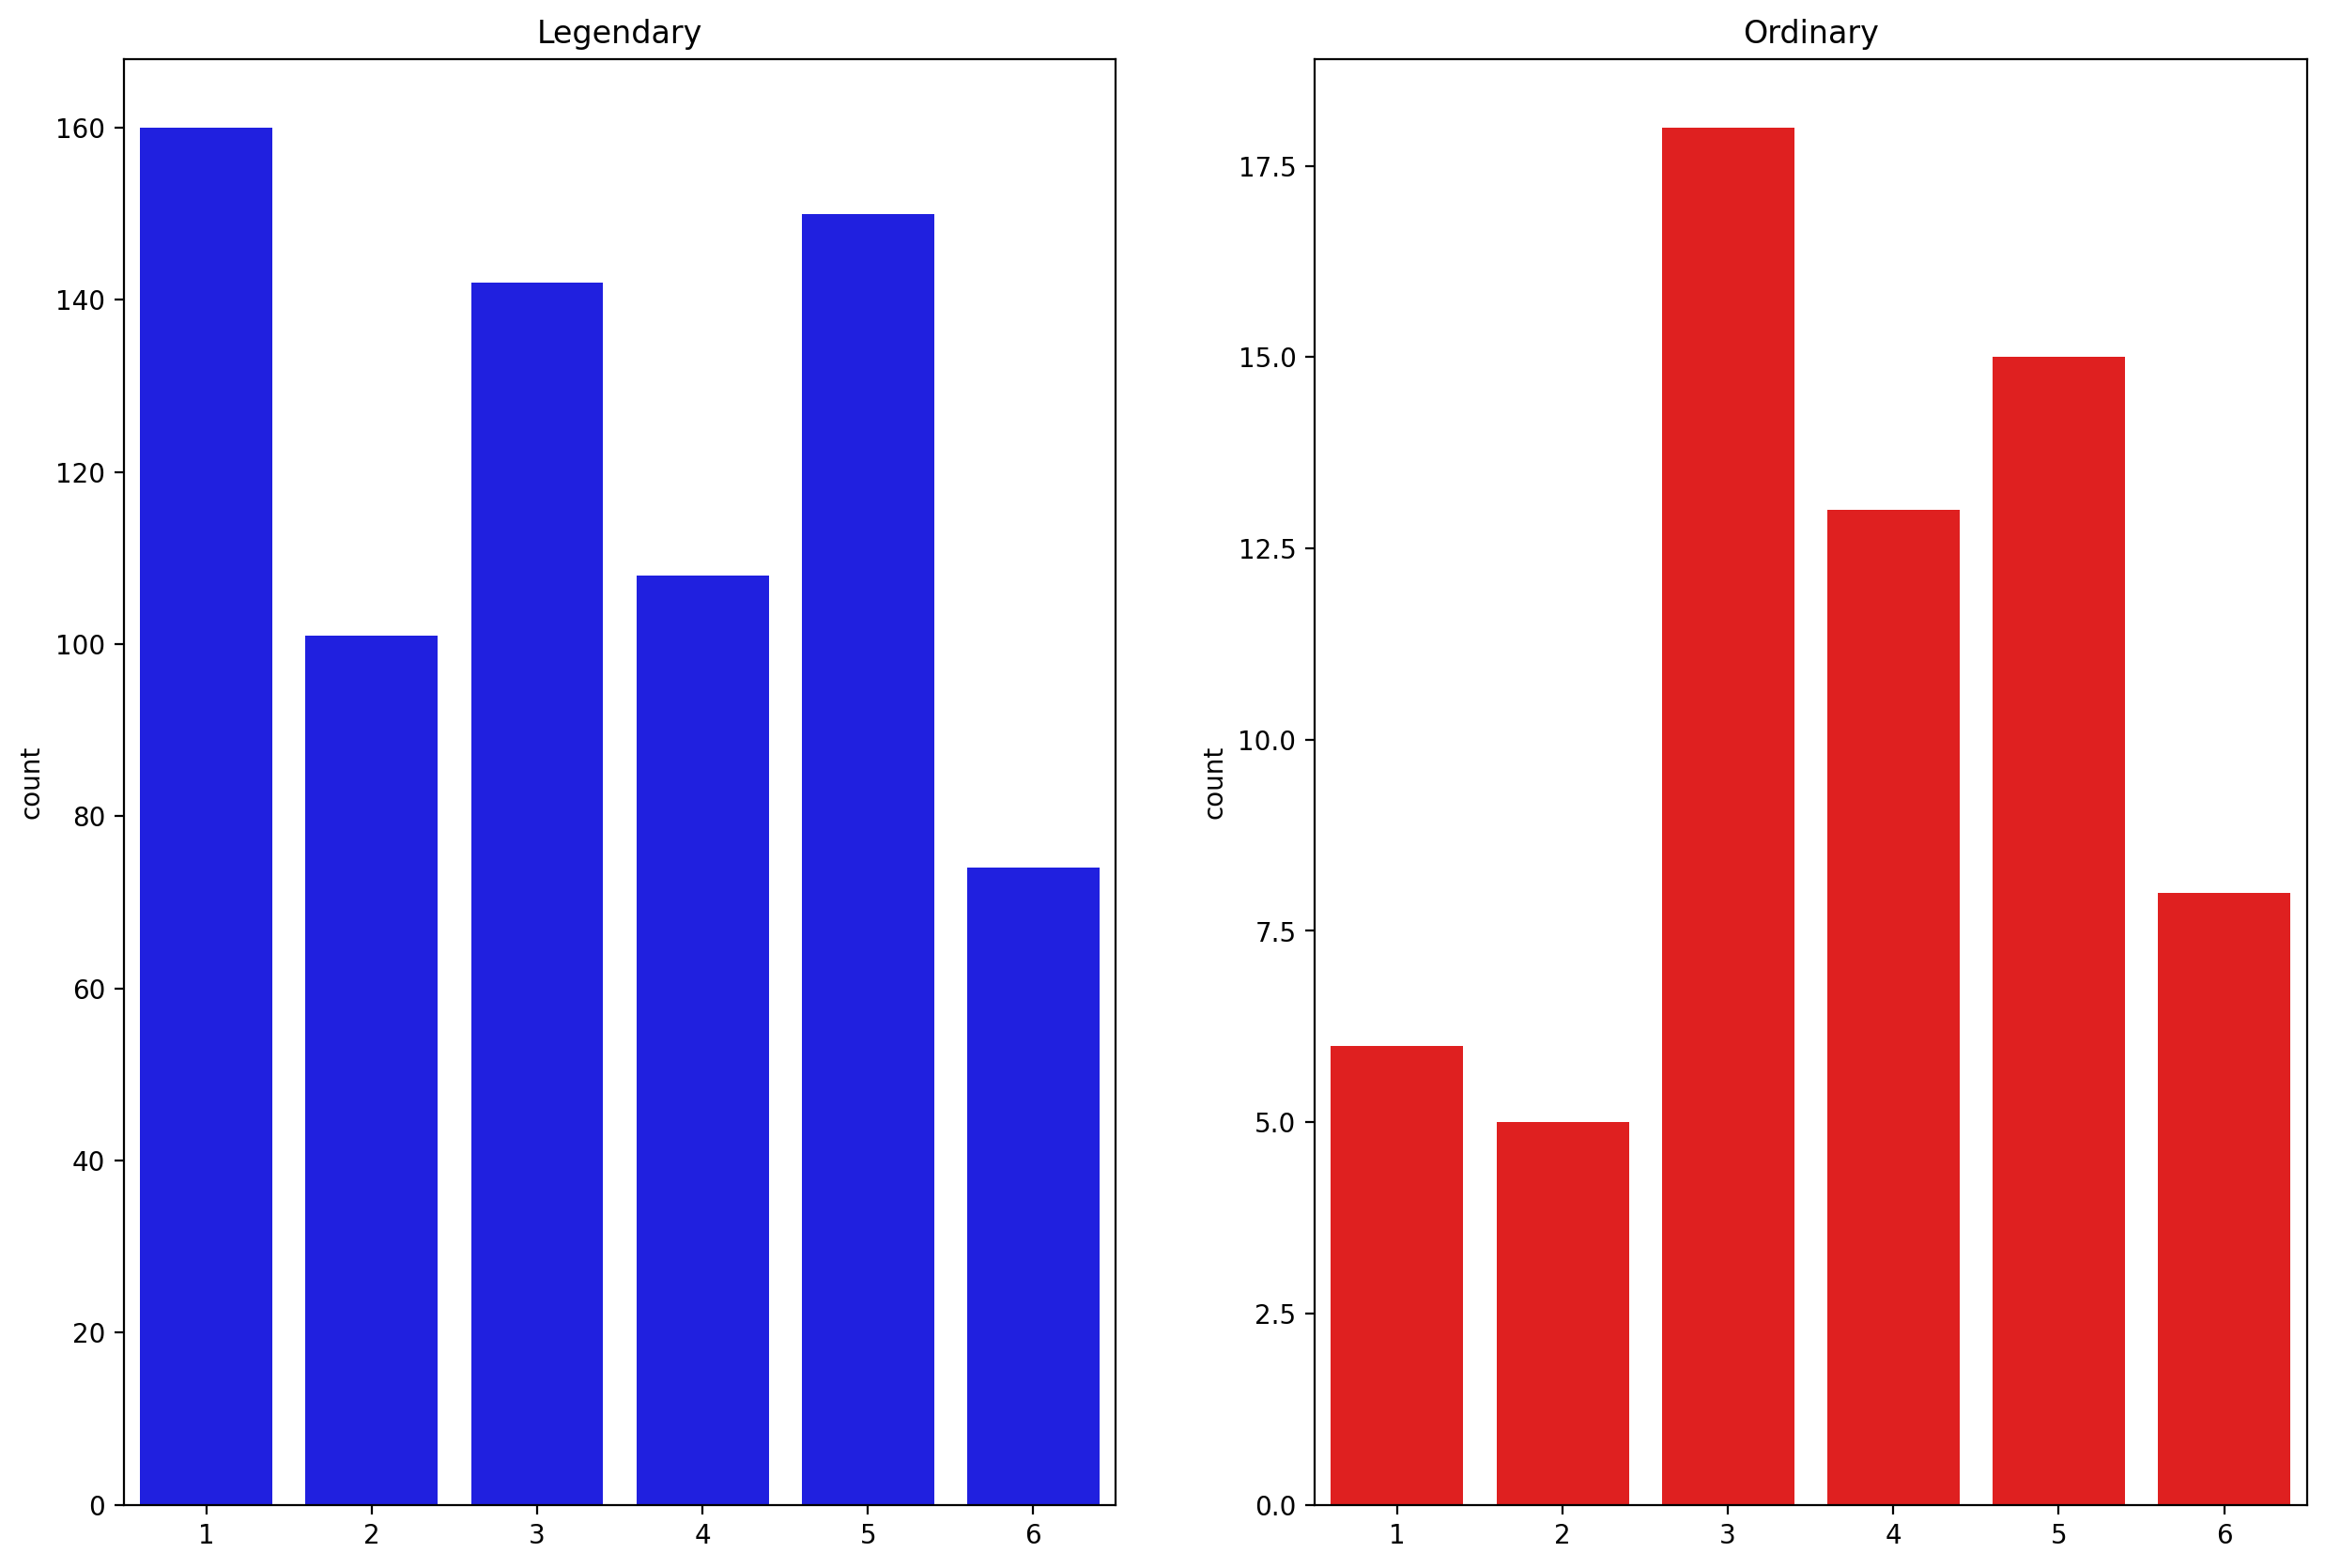

In [23]:
# 세대 정보 확인
plt.figure(figsize=(15, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(121)
sns.countplot(data = pokemon_data[pokemon_data['Legendary'] == False],
              x = "Generation", color = 'blue').set_xlabel('')
plt.title("Legendary")
plt.subplot(122)
sns.countplot(data = pokemon_data[pokemon_data['Legendary'] == True],
              x = "Generation", color = 'red').set_xlabel('')
plt.title("Ordinary")
plt.show()


'''
   1, 2, 6세대 전설 포켓몬은 절대적으로도 상대적으로도 희귀
'''

---

#### 2) 일반 포켓몬, 레전드 포켓몬 특성 이헤

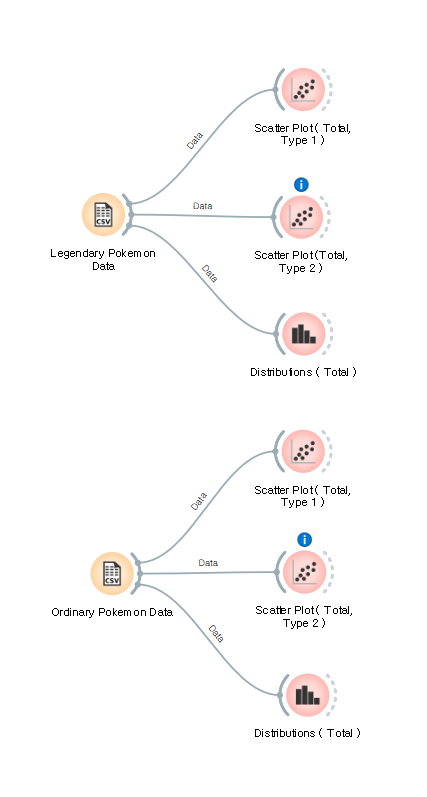

In [26]:
# 전설의 포켓몬 데이터셋
legendary_pokemon_data = pokemon_data[pokemon_data["Legendary"] == True].reset_index(drop=True)

# 일반 포켓몬 데이터셋
ordinary_pokemon_data = pokemon_data[pokemon_data["Legendary"] == False].reset_index(drop=True)

In [27]:
# 원본 데이터에 있었던 결측 정보 확인
legendary_pokemon_data.info()
ordinary_pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           65 non-null     int64 
 1   Name        65 non-null     object
 2   Type 1      65 non-null     object
 3   Type 2      40 non-null     object
 4   Total       65 non-null     int64 
 5   HP          65 non-null     int64 
 6   Attack      65 non-null     int64 
 7   Defense     65 non-null     int64 
 8   Sp. Atk     65 non-null     int64 
 9   Sp. Def     65 non-null     int64 
 10  Speed       65 non-null     int64 
 11  Generation  65 non-null     int64 
 12  Legendary   65 non-null     bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 6.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           735 non-null    int64 
 1   Name    

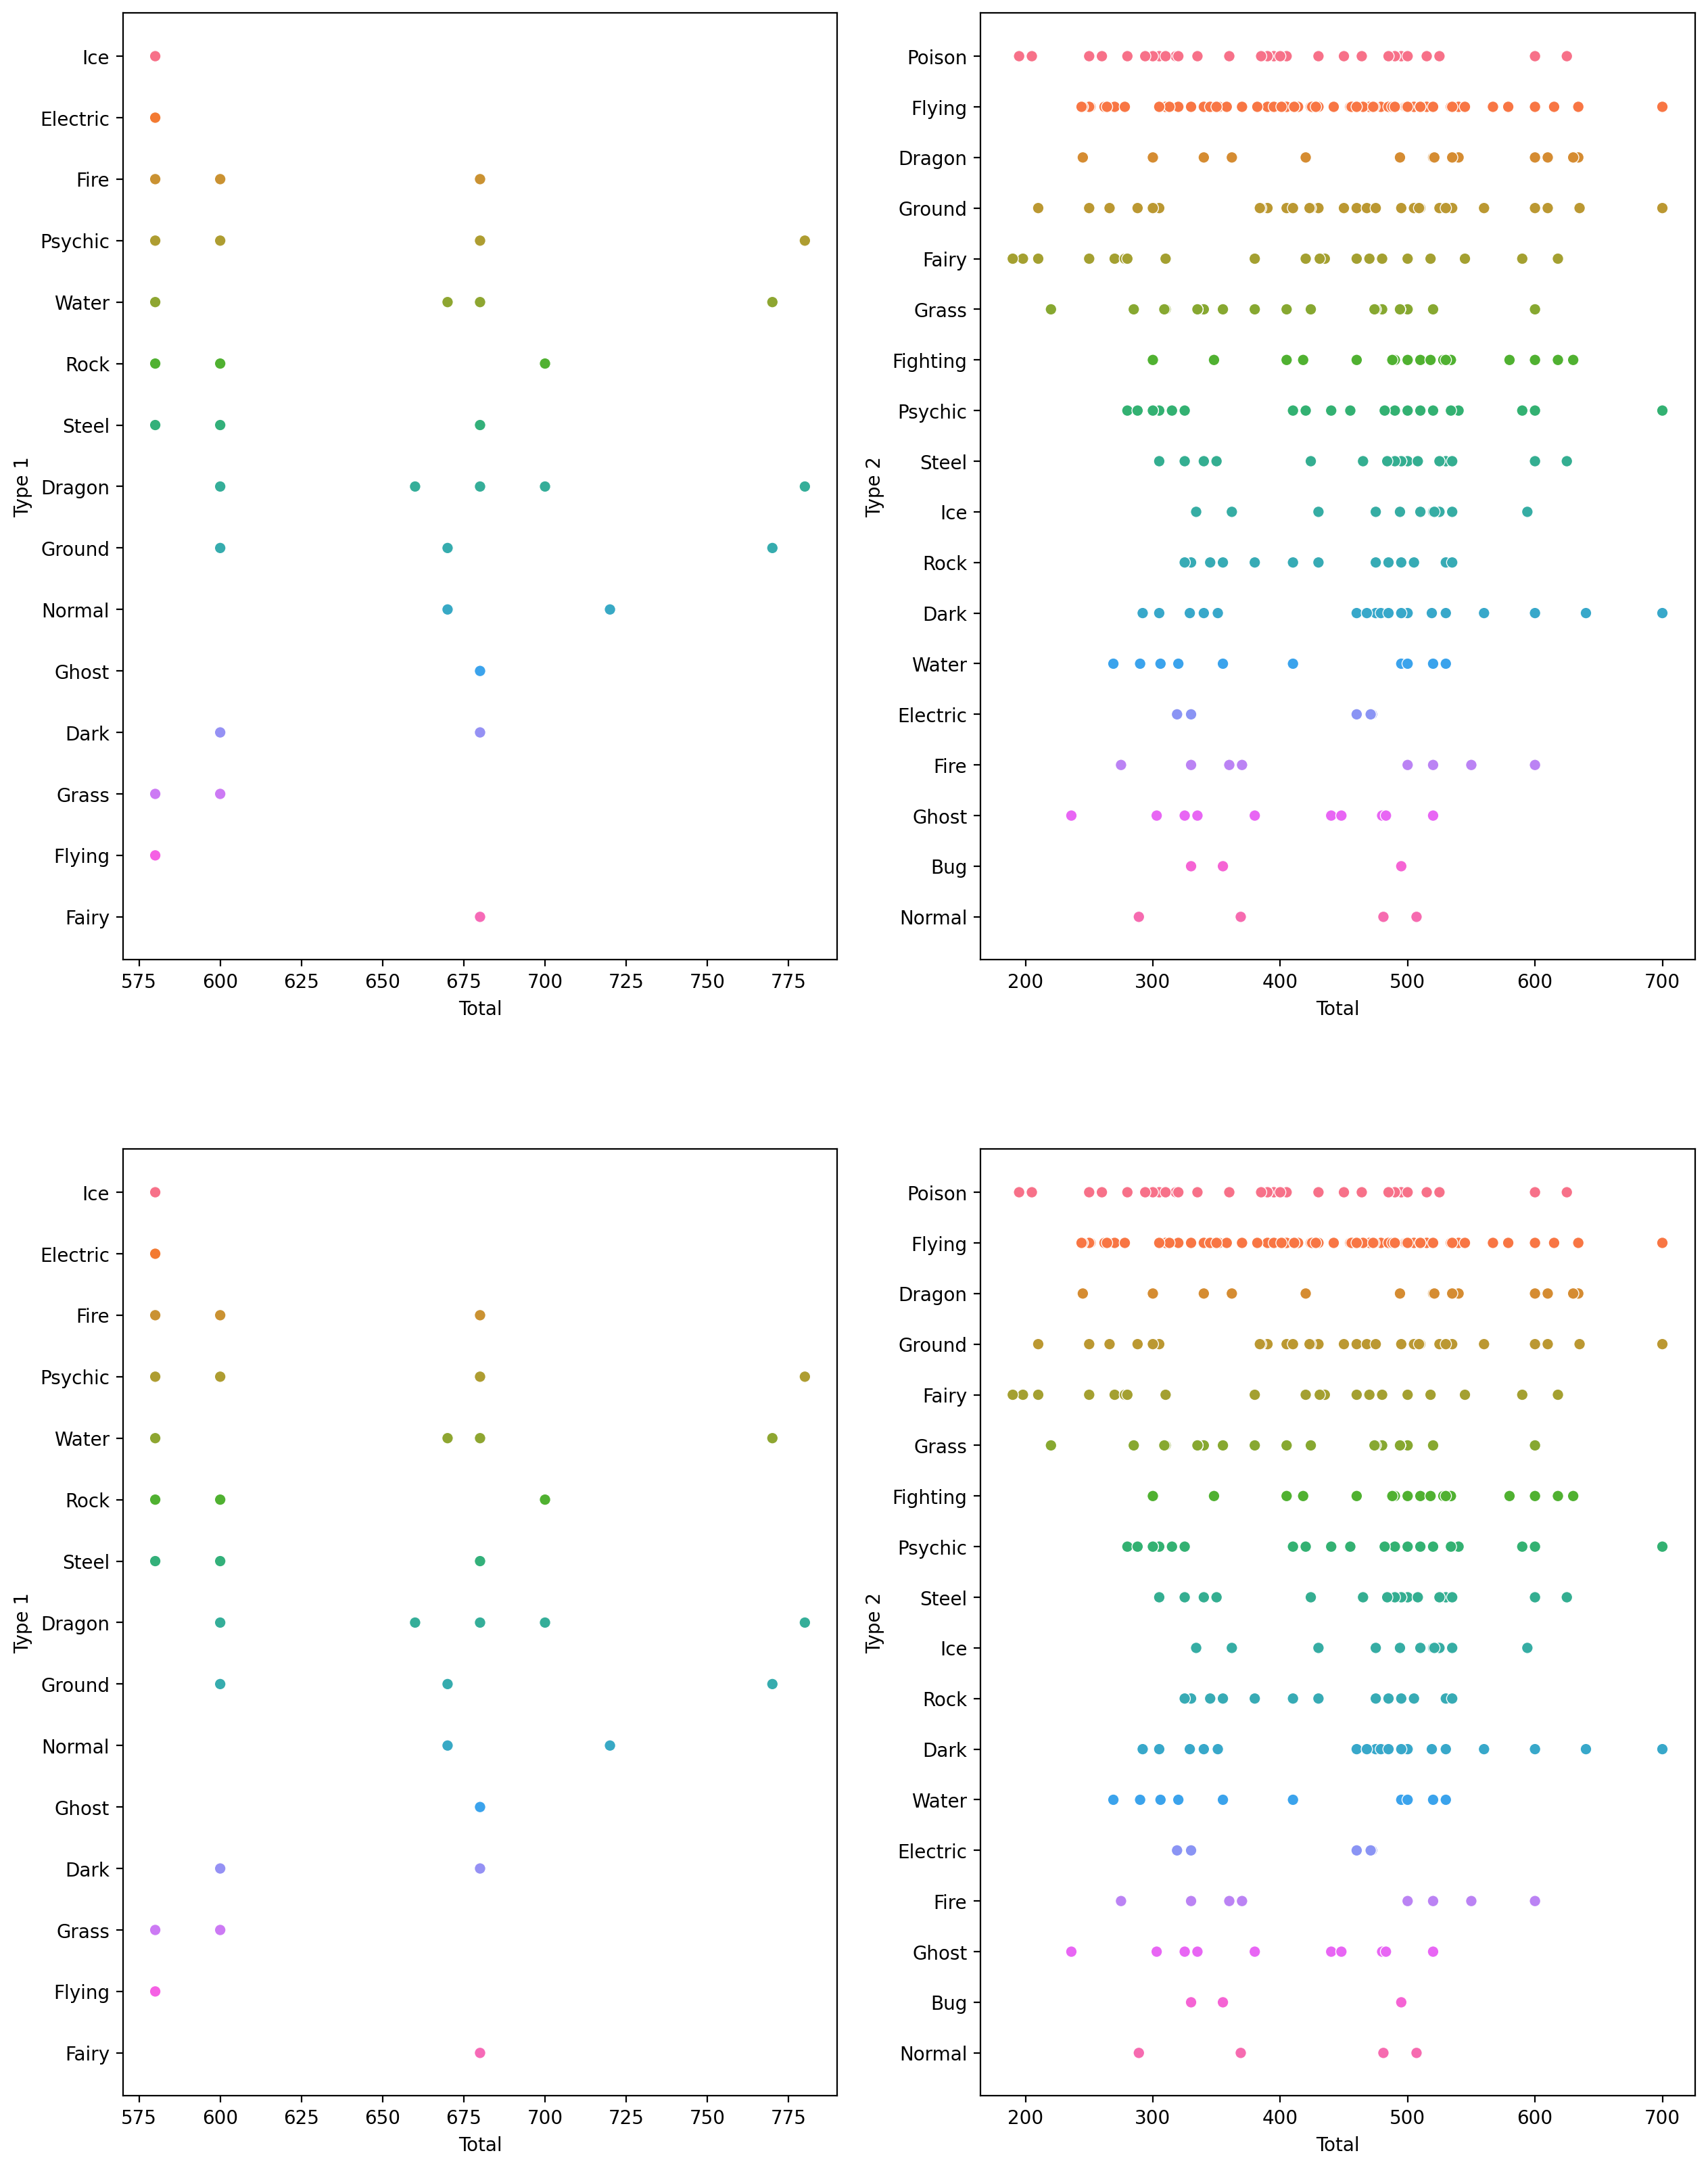

'\n   전설의 포켓몬은 일부 속성(Poison, Bug 등)을 갖지 않는다.\n'

In [36]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 20)

# 전설의 포켓몬 ( Total, Type 1 ) 관계
sns.scatterplot(data = legendary_pokemon_data, y = "Type 1", x = "Total",
                hue = "Type 1", ax = ax1, legend = False)

# 전설의 포켓몬 ( Total, Type 2 ) 관계
sns.scatterplot(data = ordinary_pokemon_data, y = "Type 2", x = "Total",
                hue = "Type 2", ax = ax2, legend = False)

# 일반 포켓몬 ( Total, Type 1 ) 관계
sns.scatterplot(data = legendary_pokemon_data, y = "Type 1", x = "Total",
                hue = "Type 1", ax = ax3, legend = False)

# 일반 포켓몬 ( Total, Type 2 ) 관계
sns.scatterplot(data = ordinary_pokemon_data, y = "Type 2", x = "Total",
                hue = "Type 2", ax = ax4, legend = False)

plt.show()



'''
   전설의 포켓몬은 일부 속성(Poison, Bug 등)을 갖지 않는다.
'''

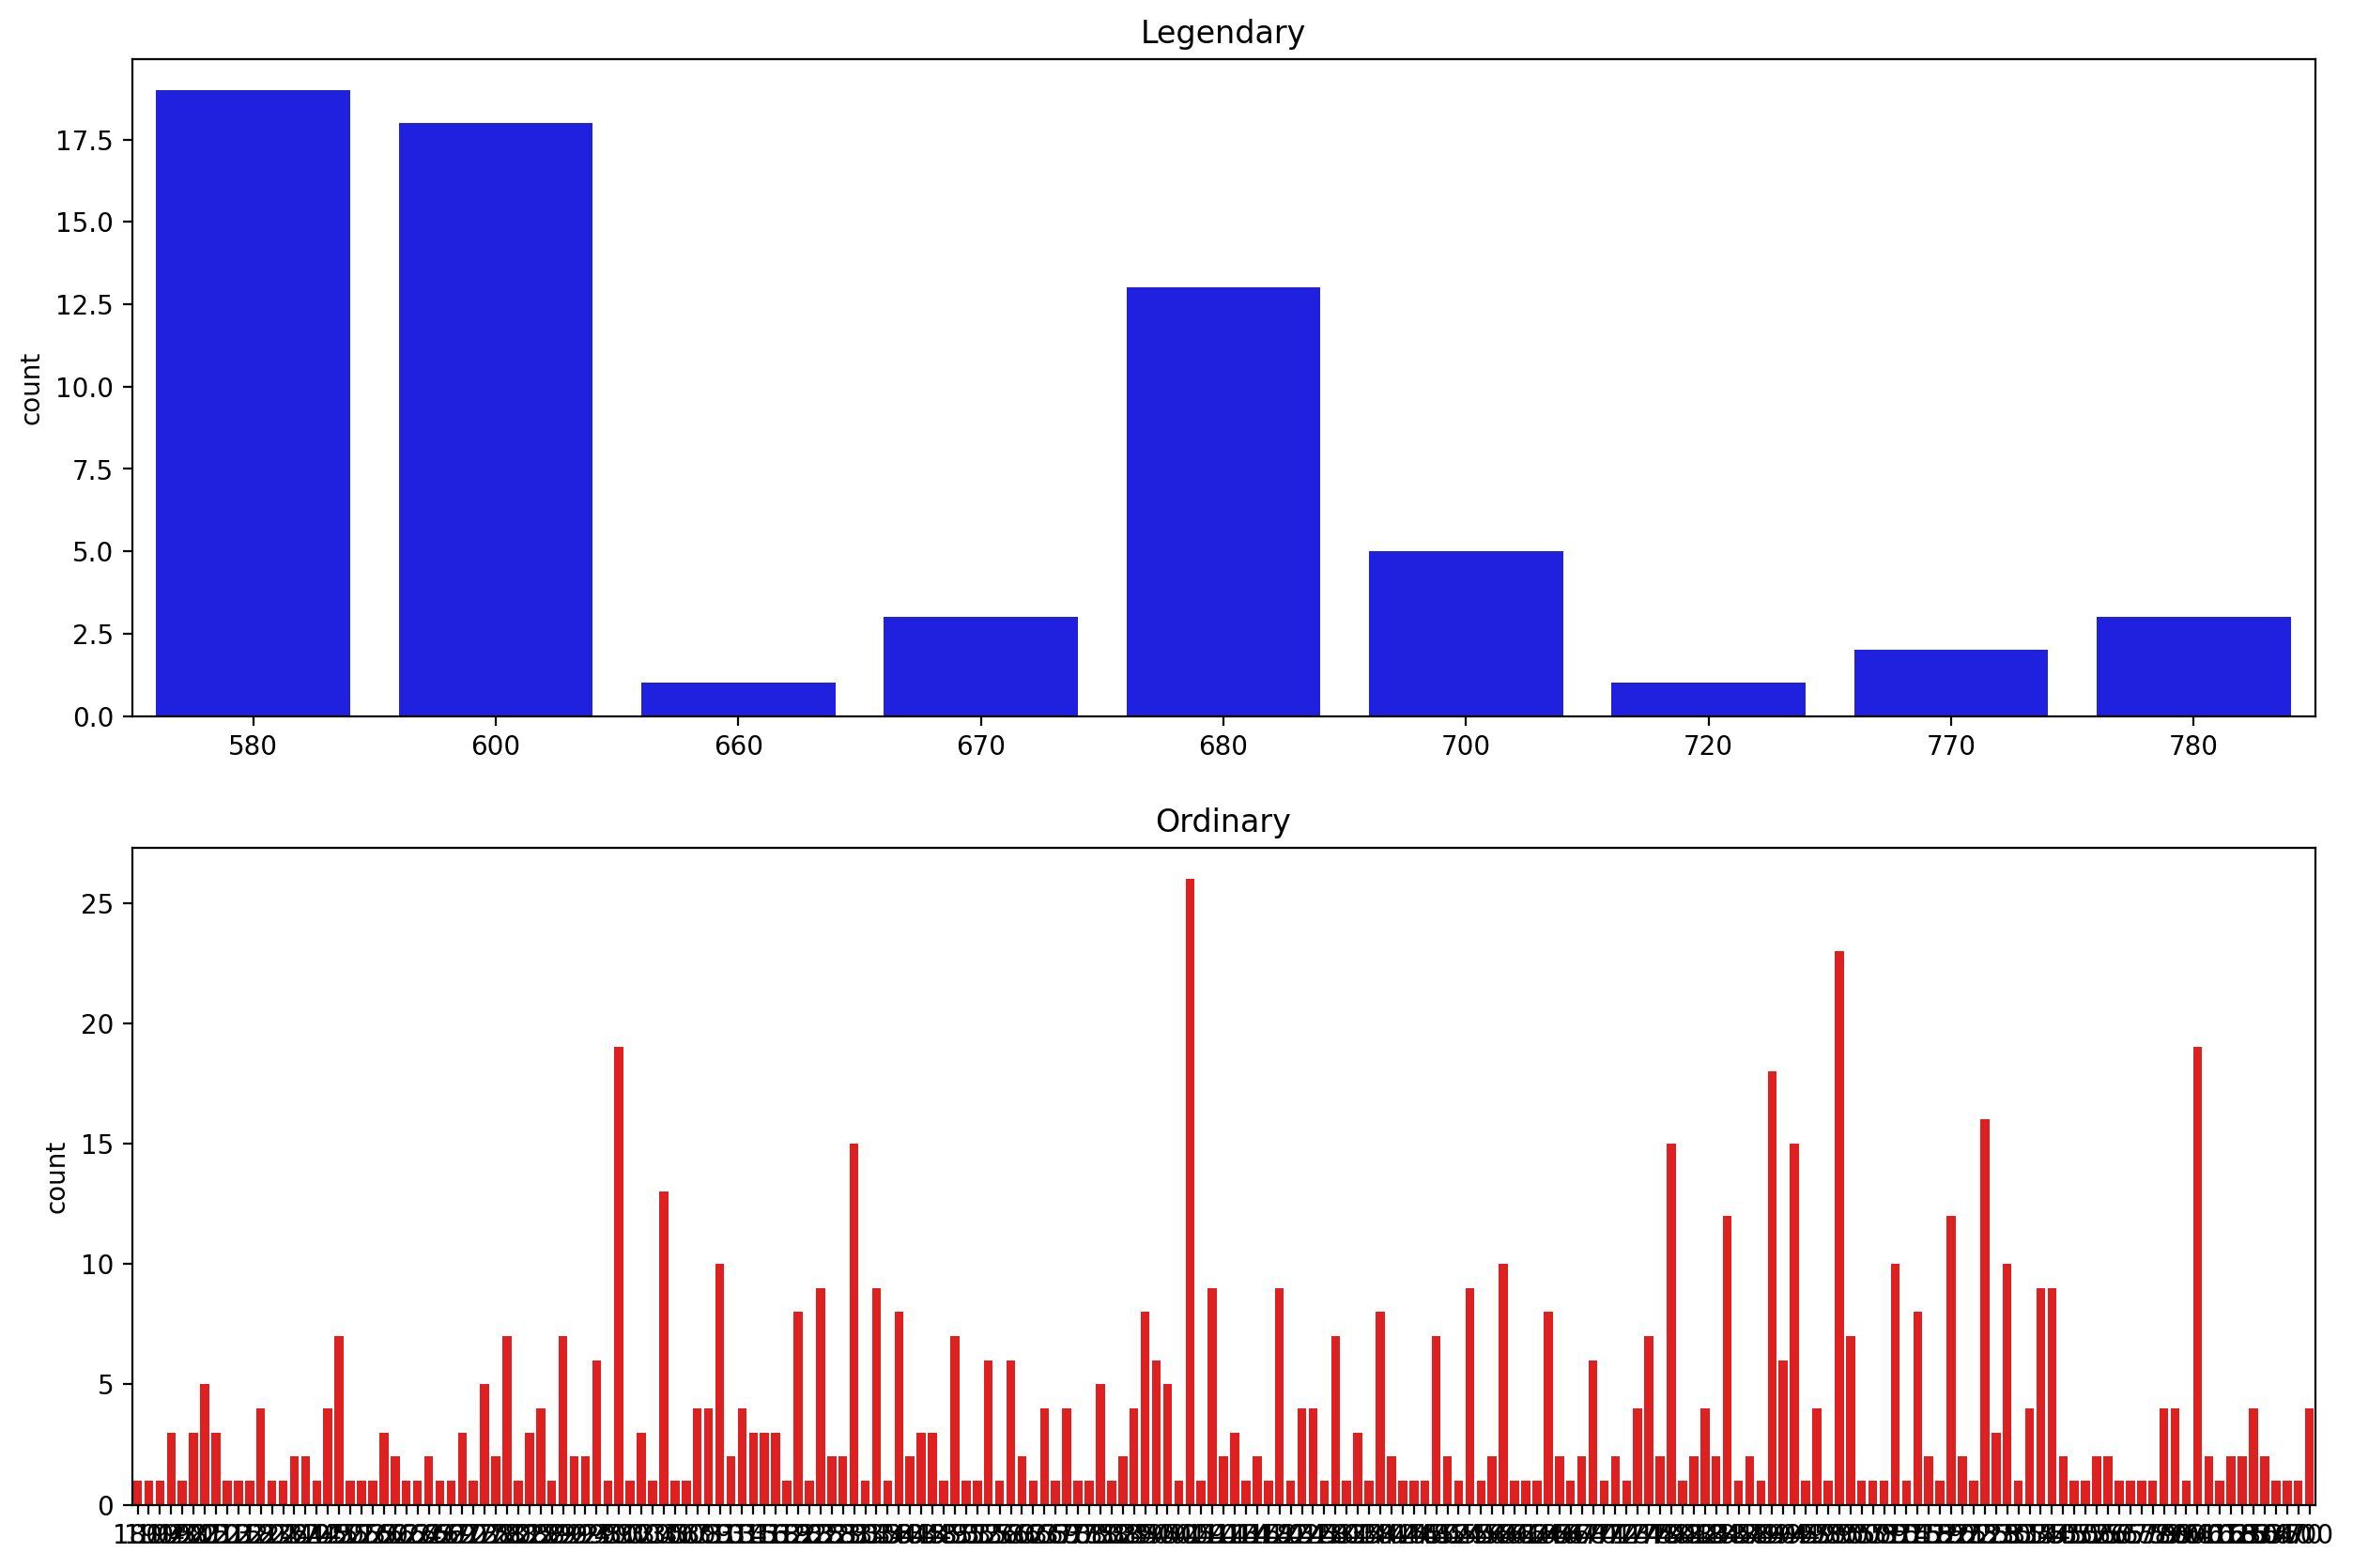

'\n   1, 2, 6세대 전설 포켓몬은 절대적으로도 상대적으로도 희귀\n'

In [42]:
# 일반 및 전설 포켓몬 Total 분포 확인
plt.figure(figsize=(15, 10))

plt.subplot(211)
sns.countplot(data = legendary_pokemon_data,
              x = "Total", color = 'blue').set_xlabel('')
plt.title("Legendary")


plt.subplot(212)
sns.countplot(data = ordinary_pokemon_data,
              x = "Total", color = 'red').set_xlabel('')
plt.title("Ordinary")


plt.show()


'''
   1, 2, 6세대 전설 포켓몬은 절대적으로도 상대적으로도 희귀
'''

In [44]:
# Total 차이 확인
set(legendary_pokemon_data["Total"]) - set(ordinary_pokemon_data["Total"])

{660, 680, 720, 770, 780}

In [45]:
# 이름 정보 화인
n1, n2, n3, n4, n5 = legendary_pokemon_data[3:6], legendary_pokemon_data[14:24],\
legendary_pokemon_data[25:29], legendary_pokemon_data[46:50], legendary_pokemon_data[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names


'''
   전설 포켓몬은 상대적으로 일반 포켓몬보다 이름이 길다.
'''

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


---

### 마. 속성 생성

In [47]:
# 전설 및 일반 포켓몬 데이터 프레임에 이름 길이 속성 'name_count' 생성
legendary_pokemon_data["name_count"] = legendary_pokemon_data["Name"].apply(lambda i: len(i))
ordinary_pokemon_data["name_count"] = ordinary_pokemon_data["Name"].apply(lambda i: len(i))


# 포켓몬 데이터 프레임에 'name_count' 생성
pokemon_data["name_count"] = pokemon_data["Name"].apply(lambda i: len(i))


# 'long_name' 속성 생성, 이름 길이가 열 자 이상일 경우 기록
pokemon_data["long_name"] = pokemon_data["name_count"] >= 10


# 'Name' 속성의 데이터에서 공백 제거 후 알파벳만 기록되는 'name_isalpha' 속성 생성
pokemon_data["Name_nospace"] = pokemon_data["Name"].apply(lambda i: i.replace(" ", ""))
pokemon_data["name_isalpha"] = pokemon_data["Name_nospace"].apply(lambda i: i.isalpha())
pokemon_data[pokemon_data["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [49]:
# 특수문자, 공백, 숫자 등이 기록된 'Name' 속성 데이터를 사용자 정의 데이터로 변경
pokemon_data = pokemon_data.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon_data = pokemon_data.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon_data = pokemon_data.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon_data = pokemon_data.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon_data = pokemon_data.replace(to_replace="Porygon2", value="Porygon Two")
pokemon_data = pokemon_data.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon_data = pokemon_data.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon_data = pokemon_data.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon_data = pokemon_data.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")


# 변경된 사용자 정의 데이터 'Name_nospace'에 기록
pokemon_data['Name_nospace'] = pokemon_data['Name'].apply(lambda i: i.replace(" ", ""))

In [52]:
# 토큰 생성 준비
import re
from collections import Counter

In [51]:
# 토큰 생성 함수 정의
def tokenize(name):
    tokens = []

    for part_name in name.split():
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [55]:
# 토큰 생성
all_tokens = list(legendary_pokemon_data['Name'].apply(tokenize).values)

token_set = []
for token in all_tokens:
  token_set.extend(token)


# 가장 많이 사용된 상위 10개 토큰 저장
most_common = Counter(token_set).most_common(10)

In [56]:
# 상위 10개 토큰을 pokemon_data에 속성으로 생성
for token, _ in most_common:
  pokemon_data[f'{token}'] = pokemon_data['Name'].str.contains(token)

In [57]:
# 포켓몬 타입(Type 1이 Type 2 포괄) 변수 생성
pokemon_types = list(set(pokemon_data["Type 1"]))


# 포켓몬 타입을 pokemon_data에 속성으로 생성
for t in pokemon_types:
  pokemon_data[t] = (pokemon_data['Type 1'] == t) | (pokemon_data['Type 2'] == t)

---

### 바. 훈련 데이터 준비

##### 1) 원본 데이터 바탕의 훈련 데이터 준비

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'


X = original_data[features]
y = original_data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

---

##### 2) 모델 생성과 훈련 및 평가 준비

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

decision_tree_model = DecisionTreeClassifier(random_state=25)

---

## **4. 모델 학습 및 평가**

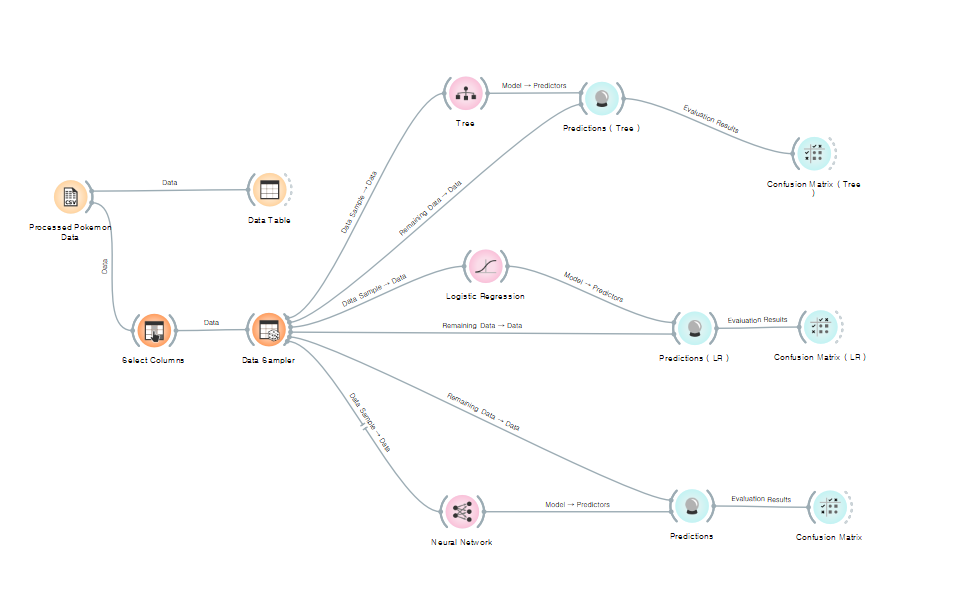

### 가. 원본 데이터 바탕의 의사결정 트리 모델

##### 1) 훈련

In [68]:
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

##### 2) 평가

In [69]:
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



### 나. 가공 데이터 바탕의 의사결정 트리 모델

In [74]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

target = "Legendary"


X = pokemon_data[features]
y = pokemon_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

#### 1) 훈련

In [75]:
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

#### 2) 평가

In [76]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



#### 3) 모델 개선 ( 학습량 조정 0.2  ->  0.21 )
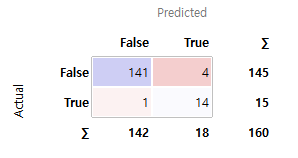

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=15)

In [119]:
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [120]:
confusion_matrix(y_test, y_pred)

array([[148,   5],
       [  1,  14]])

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       153
        True       0.74      0.93      0.82        15

    accuracy                           0.96       168
   macro avg       0.87      0.95      0.90       168
weighted avg       0.97      0.96      0.97       168



---

### 다. 다른 모델 생성과 학습, 평가

#### 1) 로지스틱 회귀 모델  
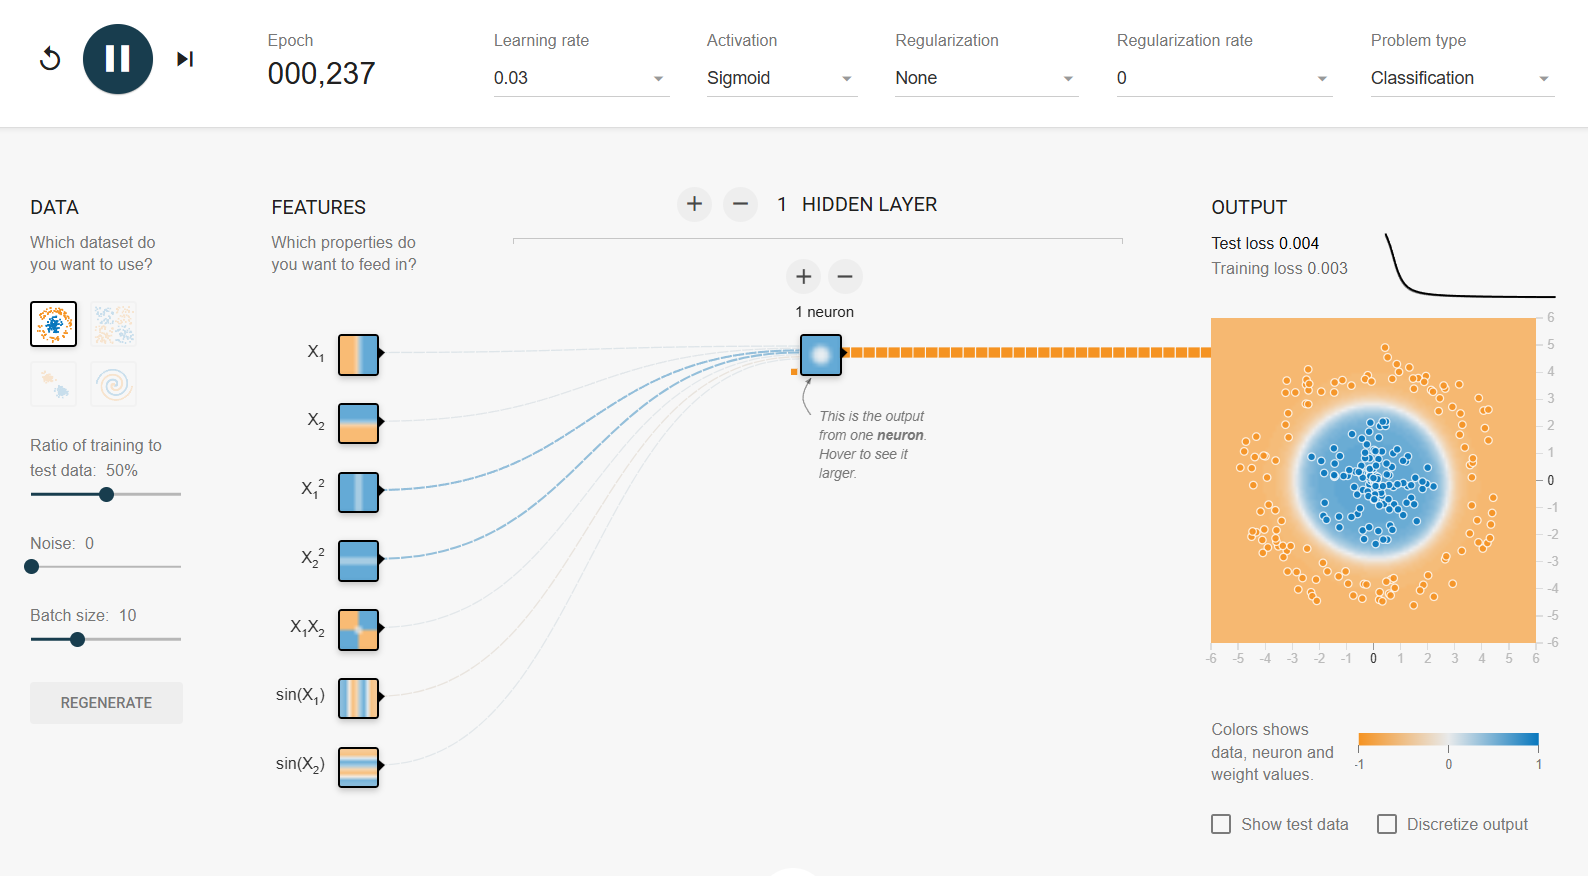

In [149]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

In [150]:
log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 100)


X = pokemon_data[features]
y = pokemon_data[target]

k = 9
kf = KFold(n_splits = k, shuffle = True, random_state = 42)
cross_val_scores = cross_val_score(log_reg, X, y, cv = kf)


print("Cross-validation scores for each fold:", cross_val_scores)
#logistic_regression_model = log_reg.fit(X_train, y_train)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}

# Perform k-fold cross-validation
cv_results = cross_validate(log_reg, X, y, cv=kf, scoring=scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for each fold: [0.92134831 0.8988764  0.97752809 0.93258427 0.92134831 0.91011236
 0.91011236 0.95505618 0.89772727]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation accuracy for each fold: [0.92134831 0.8988764  0.97752809 0.93258427 0.92134831 0.91011236
 0.91011236 0.95505618 0.89772727]
Mean cross-validation accuracy: 0.9249659516513451
Standard deviation of cross-validation accuracy: 0.024980619301987344
Cross-validation precision for each fold: [0.91514179 0.89055645 0.98501873 0.93728769 0.89713289 0.88182875
 0.89881031 0.95712256 0.86535412]
Mean cross-validation precision: 0.9142503657780574
Standard deviation of cross-validation precision: 0.0363814787414161
Cross-validation recall for each fold: [0.92134831 0.8988764  0.97752809 0.93258427 0.92134831 0.91011236
 0.91011236 0.95505618 0.89772727]
Mean cross-validation recall: 0.9249659516513451
Standard deviation of cross-validation recall: 0.024980619301987344


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [141]:
# 교차 검증 하기 전
confusion_matrix(y_test, y_pred)

array([[152,   1],
       [  5,  10]])

In [142]:
# 교차 검증 하기 전
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       153
        True       0.91      0.67      0.77        15

    accuracy                           0.96       168
   macro avg       0.94      0.83      0.87       168
weighted avg       0.96      0.96      0.96       168



In [151]:
# Print the cross-validation results
print("Cross-validation accuracy for each fold:", cv_results['test_accuracy'])
print("Mean cross-validation accuracy:", np.mean(cv_results['test_accuracy']))
print("Standard deviation of cross-validation accuracy:", np.std(cv_results['test_accuracy']))

print("Cross-validation precision for each fold:", cv_results['test_precision'])
print("Mean cross-validation precision:", np.mean(cv_results['test_precision']))
print("Standard deviation of cross-validation precision:", np.std(cv_results['test_precision']))

print("Cross-validation recall for each fold:", cv_results['test_recall'])
print("Mean cross-validation recall:", np.mean(cv_results['test_recall']))
print("Standard deviation of cross-validation recall:", np.std(cv_results['test_recall']))

Cross-validation accuracy for each fold: [0.92134831 0.8988764  0.97752809 0.93258427 0.92134831 0.91011236
 0.91011236 0.95505618 0.89772727]
Mean cross-validation accuracy: 0.9249659516513451
Standard deviation of cross-validation accuracy: 0.024980619301987344
Cross-validation precision for each fold: [0.91514179 0.89055645 0.98501873 0.93728769 0.89713289 0.88182875
 0.89881031 0.95712256 0.86535412]
Mean cross-validation precision: 0.9142503657780574
Standard deviation of cross-validation precision: 0.0363814787414161
Cross-validation recall for each fold: [0.92134831 0.8988764  0.97752809 0.93258427 0.92134831 0.91011236
 0.91011236 0.95505618 0.89772727]
Mean cross-validation recall: 0.9249659516513451
Standard deviation of cross-validation recall: 0.024980619301987344


#### 2) DNN 모델